## 1. Bussiness Understanding

## 2. Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px

df = pd.read_csv("Mall_Customers.csv")

# Revisar las primeras filas
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Estadísticas descriptivas
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


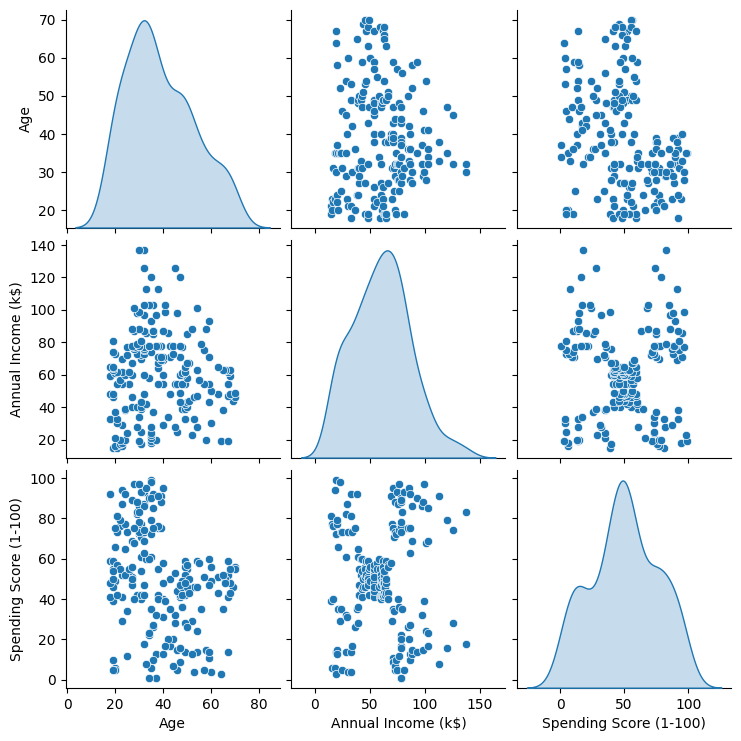

In [7]:
# Distribución de variables
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']], diag_kind='kde')
plt.show()

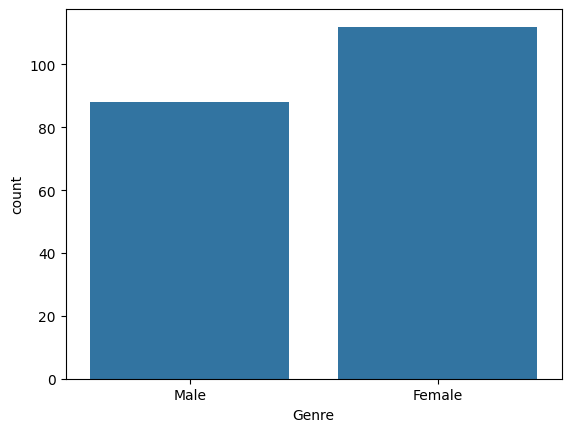

In [8]:
# Distribución por género
sns.countplot(x='Genre', data=df)
plt.show()

## 3. Data Preparation

In [9]:
# Eliminamos columna CustomerID
df_clean = df.drop(['CustomerID'], axis=1)

# Codificar género
df_clean['Genre'] = df_clean['Genre'].map({'Male':0,'Female':1})

# Escalamiento de variables numéricas
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

df_scaled[:5]  # Vista previa de los datos escalados

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992]])

## 4. Modeling: Modelos de clustering

### Método del codo

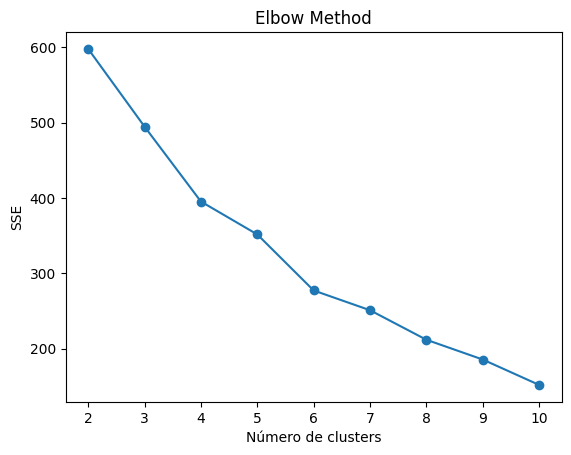

In [12]:
# Determinar número óptimo de clusters usando Elbow
sse = []
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.plot(range(2,11), sse, marker='o')
plt.xlabel('Número de clusters')~
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

### KMeans - Entrenamiento

In [16]:
# Entrenar KMeans con k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Visualización
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
           color='KMeans_Cluster', hover_data=['Age','Genre'])

### DBSCAN - Entrenamiento

In [18]:
# Entrenar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Visualización
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
           color='DBSCAN_Cluster', hover_data=['Age','Genre'])

### Agglomerative Clustering - Entrenamiento

In [20]:
# Entrenar Agglomerative
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(df_scaled)

# Visualización
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
           color='Agglo_Cluster', hover_data=['Age','Genre'])

## Evaluación de modelos

In [21]:
# Función para calcular Silhouette Score
def evaluate_model(data, labels, model_name):
    if len(set(labels)) > 1:  # DBSCAN puede generar -1 como ruido
        score = silhouette_score(data, labels)
        print(f"{model_name} Silhouette Score: {score:.3f}")
    else:
        print(f"{model_name} tiene un único cluster o ruido, no se puede calcular Silhouette.")

evaluate_model(df_scaled, df['KMeans_Cluster'], "KMeans")
evaluate_model(df_scaled, df['DBSCAN_Cluster'], "DBSCAN")
evaluate_model(df_scaled, df['Agglo_Cluster'], "Agglomerative")

KMeans Silhouette Score: 0.272
DBSCAN Silhouette Score: 0.278
Agglomerative Silhouette Score: 0.287


## Deployment

In [23]:
# Guardar resultados finales
df_final = df[['Age','Genre','Annual Income (k$)','Spending Score (1-100)',
               'KMeans_Cluster','DBSCAN_Cluster','Agglo_Cluster']]

df_final.to_excel('Customer_Segmentation.xlsx', index=False)
print("Archivo exportado: Customer_Segmentation.xlsx")

Archivo exportado: Customer_Segmentation.xlsx


### Post procesamiento de los datos

In [25]:
import pandas as pd

# Cargar los datos exportados
df_out = pd.read_excel("Customer_Segmentation.xlsx")

# Convertir Gender a numérico (opcional)
df_out['Gender_num'] = df_out['Genre'].map({'Male': 0, 'Female': 1})

# Verificar
df_out.head()

,Age,Genre,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,DBSCAN_Cluster,Agglo_Cluster,Gender_num
0,19,Male,15,39,2,0,0,0
1,21,Male,15,81,2,0,0,0
2,20,Female,16,6,4,1,3,1
3,23,Female,16,77,4,1,0,1
4,31,Female,17,40,4,1,3,1


In [26]:
# Seleccionar modelo a analizar, por ejemplo KMeans
cluster_col = 'KMeans_Cluster'

# Agrupar por cluster y calcular métricas
cluster_summary = df_out.groupby(cluster_col).agg({
    'Age': ['mean','min','max'],
    'Gender_num': 'mean',  # % mujeres en el cluster
    'Annual Income (k$)': ['mean','min','max'],
    'Spending Score (1-100)': ['mean','min','max'],
    'Genre': lambda x: x.mode()[0]  # género más frecuente
}).reset_index()

# Renombrar columnas para Power BI
cluster_summary.columns = ['Cluster','Age_mean','Age_min','Age_max',
                           'Female_ratio','Income_mean','Income_min','Income_max',
                           'Spending_mean','Spending_min','Spending_max','Most_Common_Gender']

cluster_summary

,Cluster,Age_mean,Age_min,Age_max,Female_ratio,Income_mean,Income_min,Income_max,Spending_mean,Spending_min,Spending_max,Most_Common_Gender
0,0,56.470588,37,70,0.490196,46.098039,19,75,39.313725,3,60,Male
1,1,39.500000,19,59,0.000000,85.150000,71,137,14.050000,1,36,Male
2,2,28.690476,18,40,0.000000,60.904762,15,137,70.238095,35,97,Male
3,3,37.897959,23,56,1.000000,82.122449,54,126,54.448980,7,95,Female
4,4,27.315789,18,43,1.000000,38.842105,16,65,56.210526,6,99,Female


In [28]:
df_out['High_Spender'] = df_out['Spending Score (1-100)'] > 70
df_out['High_Income'] = df_out['Annual Income (k$)'] > 70

In [29]:
bins = [0, 25, 40, 60, 100]
labels = ['18-25','26-40','41-60','61+']
df_out['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [30]:
df.to_excel("Customer_Segmentation_Preprocessed.xlsx", index=False)